# Digit Recognization

In [1]:
#Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC

In [2]:
#Reading the data set
digit_df = pd.read_csv("train.csv")

In [3]:

digit_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(digit_df.index)

42000

In [5]:
#Fetching 20 percent of the data
digit_df=digit_df.head(int(len(digit_df.index)/100)*50)

In [6]:
len(digit_df.index)

21000

In [7]:
#We find that there are no NAN's
digit_df.isnull().values.any()

False

# Data Preperation and Scaling

In [8]:
scalar=StandardScaler()

In [9]:
#Converting the data type of all the columns to int
digit_df=digit_df.astype("int")

In [10]:
#Preparing the data for test train split
Y=digit_df["label"]
X=digit_df.drop(["label"],axis=1)

In [11]:
#preforming scaling onthe data set 
X=scale(X)

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8)

# EDA

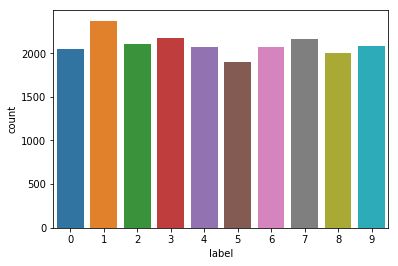

In [13]:
sns.countplot(digit_df['label'])

From the above plot we can see that the disrtibution of each label is nearly equal over the data. Hence the data is good enough to train

# Model Building using SVC

In [14]:
# Model building


model = SVC(kernel="linear")

# fit
model.fit(X_train, Y_train)

# predict
y_pred = model.predict(X_test)

In [15]:
list(y_pred).count(1)

524

In [16]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.9107142857142857 

[[387   0   2   3   2   1   0   0   0   0]
 [  0 499   1   2   0   0   0   0   5   2]
 [  5   2 358   6   6   2   5   6  10   0]
 [  2   5  15 393   1  17   1   4  14   2]
 [  2   2   3   0 410   3   2   1   2  11]
 [  2   6   2  17   5 323   3   0   9   2]
 [  7   0   6   0   4   6 391   0   2   0]
 [  2   2   4   5   4   1   0 416   0  25]
 [  2   7   9  24   1  22   0   0 309   1]
 [  0   1   6   4  17   2   0  15   3 339]]


In [17]:
print(metrics.classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       395
          1       0.95      0.98      0.97       509
          2       0.88      0.90      0.89       400
          3       0.87      0.87      0.87       454
          4       0.91      0.94      0.93       436
          5       0.86      0.88      0.87       369
          6       0.97      0.94      0.96       416
          7       0.94      0.91      0.92       459
          8       0.87      0.82      0.85       375
          9       0.89      0.88      0.88       387

avg / total       0.91      0.91      0.91      4200



In [18]:
# Model building


model = SVC(kernel="rbf")

# fit
model.fit(X_train, Y_train)

# predict
y_pred = model.predict(X_test)

In [19]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.9480952380952381 

[[389   0   3   0   1   1   0   0   1   0]
 [  0 498   6   0   1   0   0   1   2   1]
 [  1   0 384   3   2   1   0   4   4   1]
 [  0   5  11 411   0  12   1   6   7   1]
 [  0   0   8   0 415   0   2   2   1   8]
 [  2   2   4   4   0 343   4   1   6   3]
 [  2   0   5   0   0   3 404   0   2   0]
 [  0   3   6   0   5   0   0 433   0  12]
 [  1   1   5   5   0   5   0   1 357   0]
 [  0   1   9   3  12   0   0  13   1 348]]


In [20]:
#RBF is giving more accuracy than linear so we will continue with 'RBF'
print(metrics.classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       395
          1       0.98      0.98      0.98       509
          2       0.87      0.96      0.91       400
          3       0.96      0.91      0.93       454
          4       0.95      0.95      0.95       436
          5       0.94      0.93      0.93       369
          6       0.98      0.97      0.98       416
          7       0.94      0.94      0.94       459
          8       0.94      0.95      0.94       375
          9       0.93      0.90      0.91       387

avg / total       0.95      0.95      0.95      4200



# Cross Validation, Grid Search for Hyperperameter C

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)      

# fit the model
model_cv.fit(X_train, Y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 1399.2min


In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


From the above Ideal value of 'C' looks to be 10 

# Rebuilding the model with ideal C

In [ ]:
#Going to re run the model for C = 10, gamma=0.01
# Model building
model = SVC(kernel="rbf",gamma=0.001,C=10)

# fit
model.fit(X_train, Y_train)

# predict
y_pred = model.predict(X_test)

In [ ]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

In [ ]:
print(metrics.classification_report(Y_test,y_pred))

In [ ]:
test_df=pd.read_csv("test.csv")

In [ ]:
test_df=scale(test_df)

In [ ]:
result = model.predict(test_df)

In [ ]:
result

In [ ]:
submission = pd.Series(result,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.head()

In [ ]:
submission.to_csv("final_submission.csv",index=False)